# Non informative preidtors

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
from vi_evi import vi_evi

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

In [3]:
X = pd.DataFrame(
    np.random.normal(0, 1, size=(200, 5)), columns=["A", "B", "C", "D", "E"]
)

Y = np.random.normal(0, 1, size=200)

In [4]:
with pm.Model() as model:
    σ = pm.Exponential("σ", 1)
    μ = pmb.BART("μ", X, Y, m=50)
    y = pm.Normal("y", mu=μ, sigma=σ, observed=Y)
    idata = pm.sample(
        chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
    )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


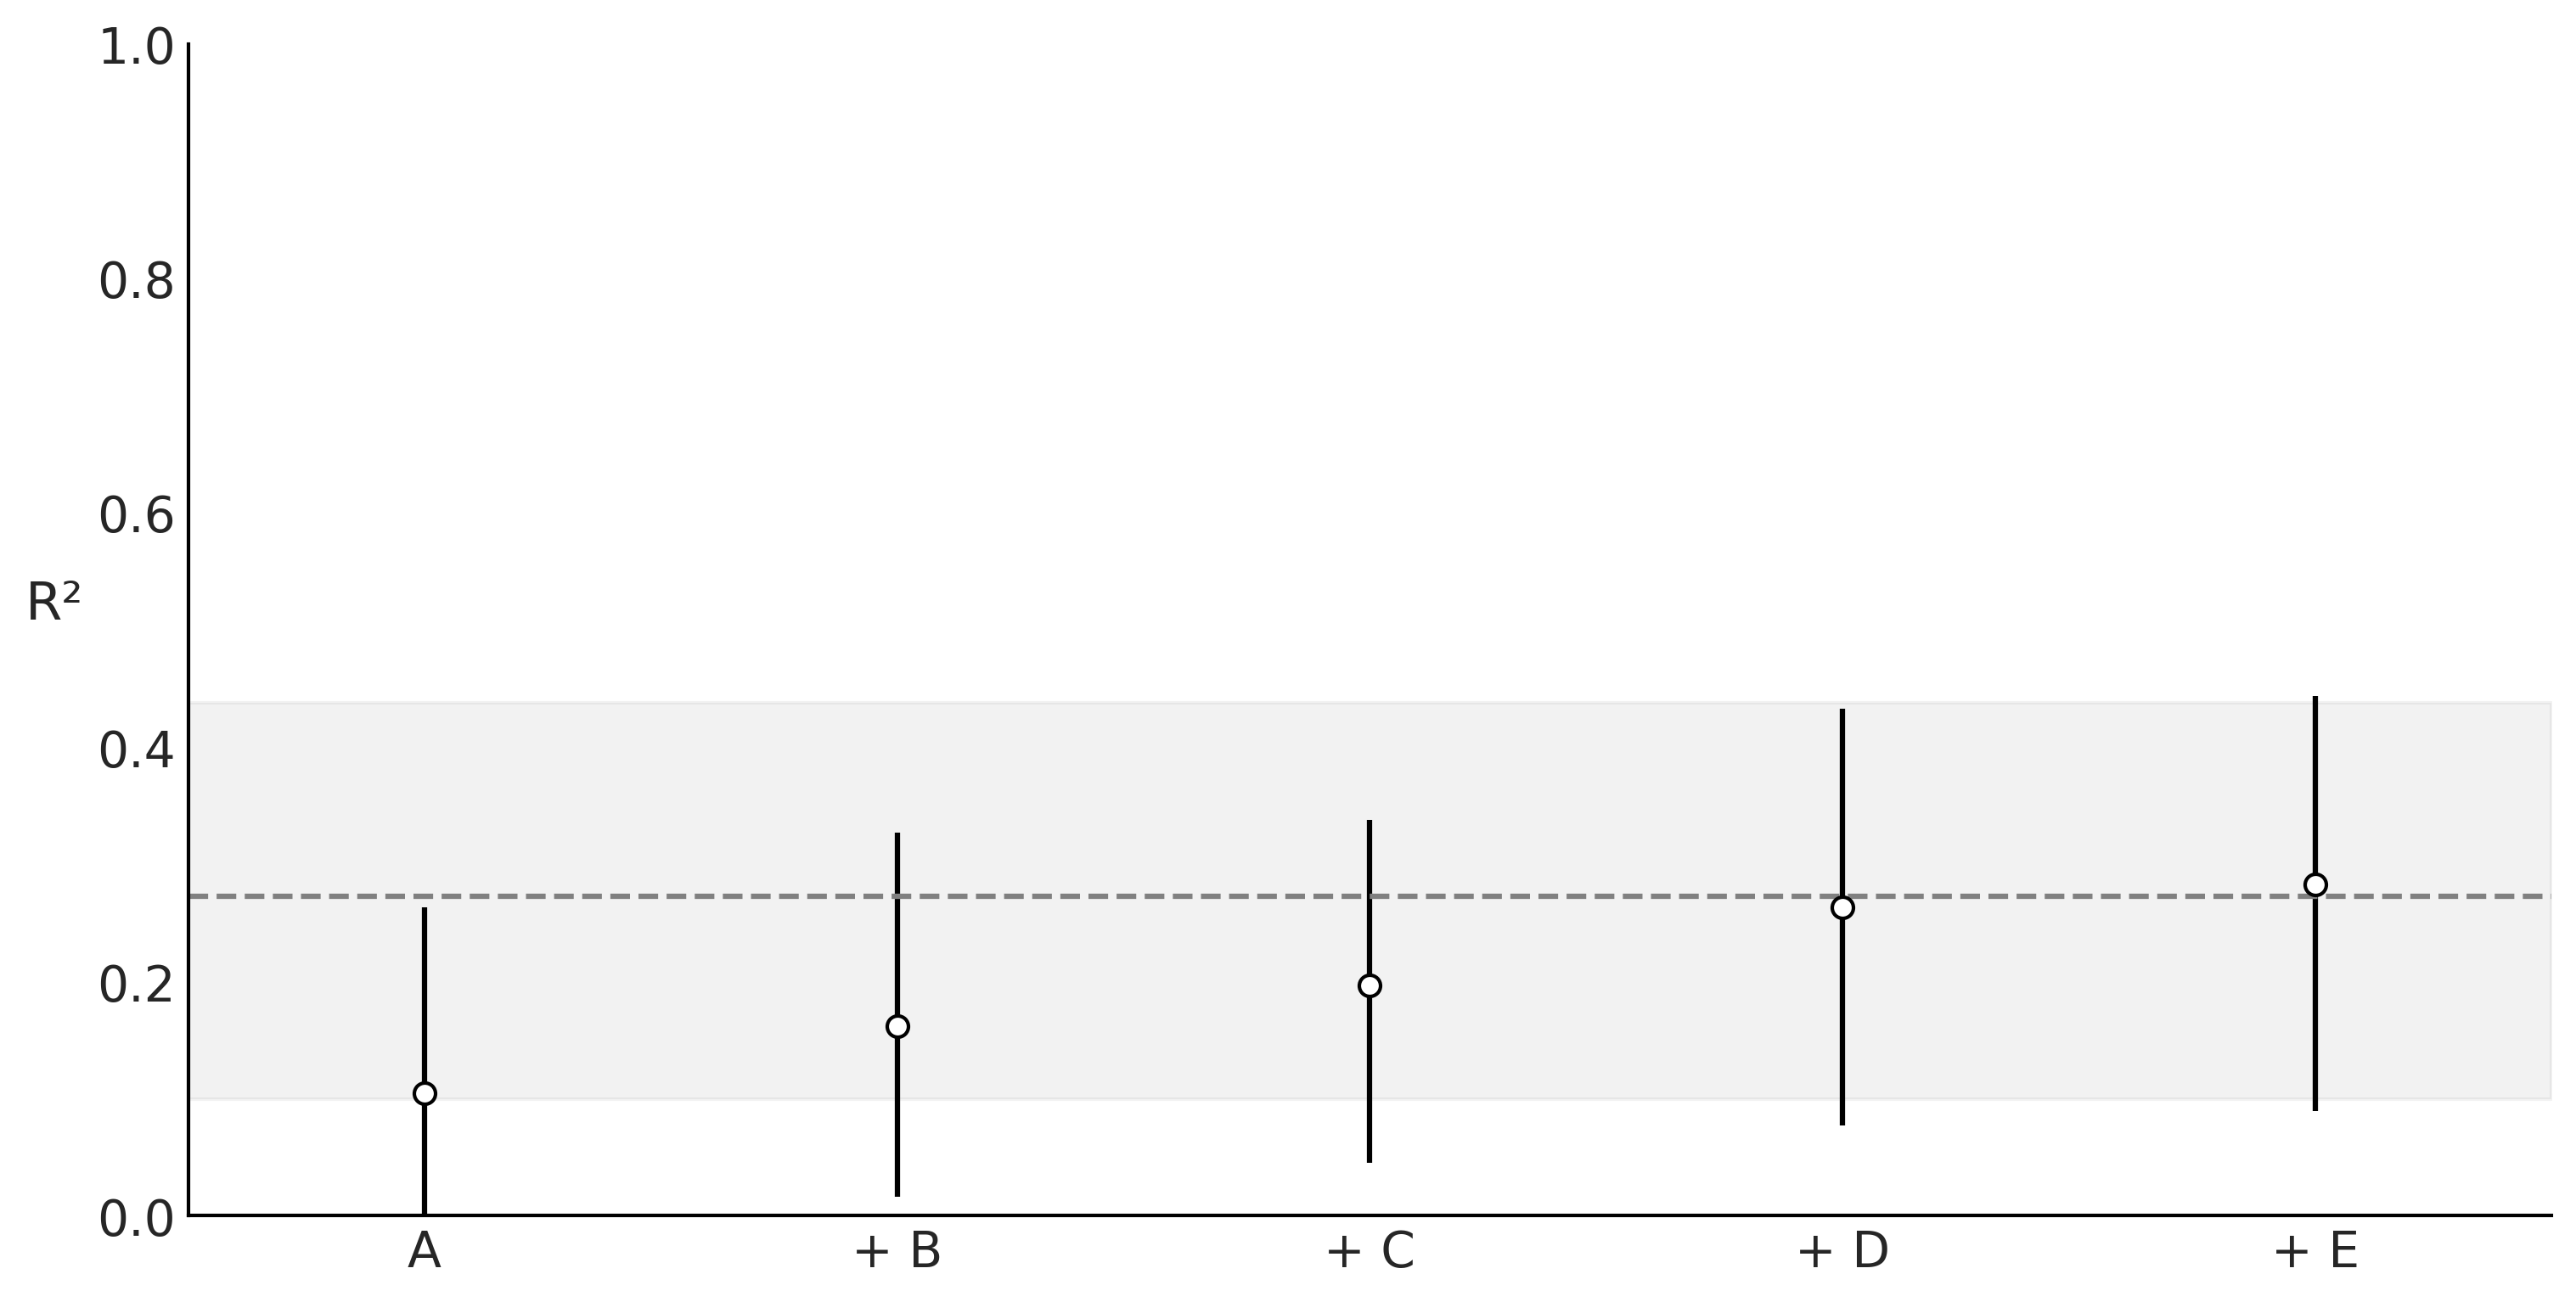

In [5]:
indices_vi, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="VI", figsize=(10, 5), random_seed=RANDOM_SEED
)

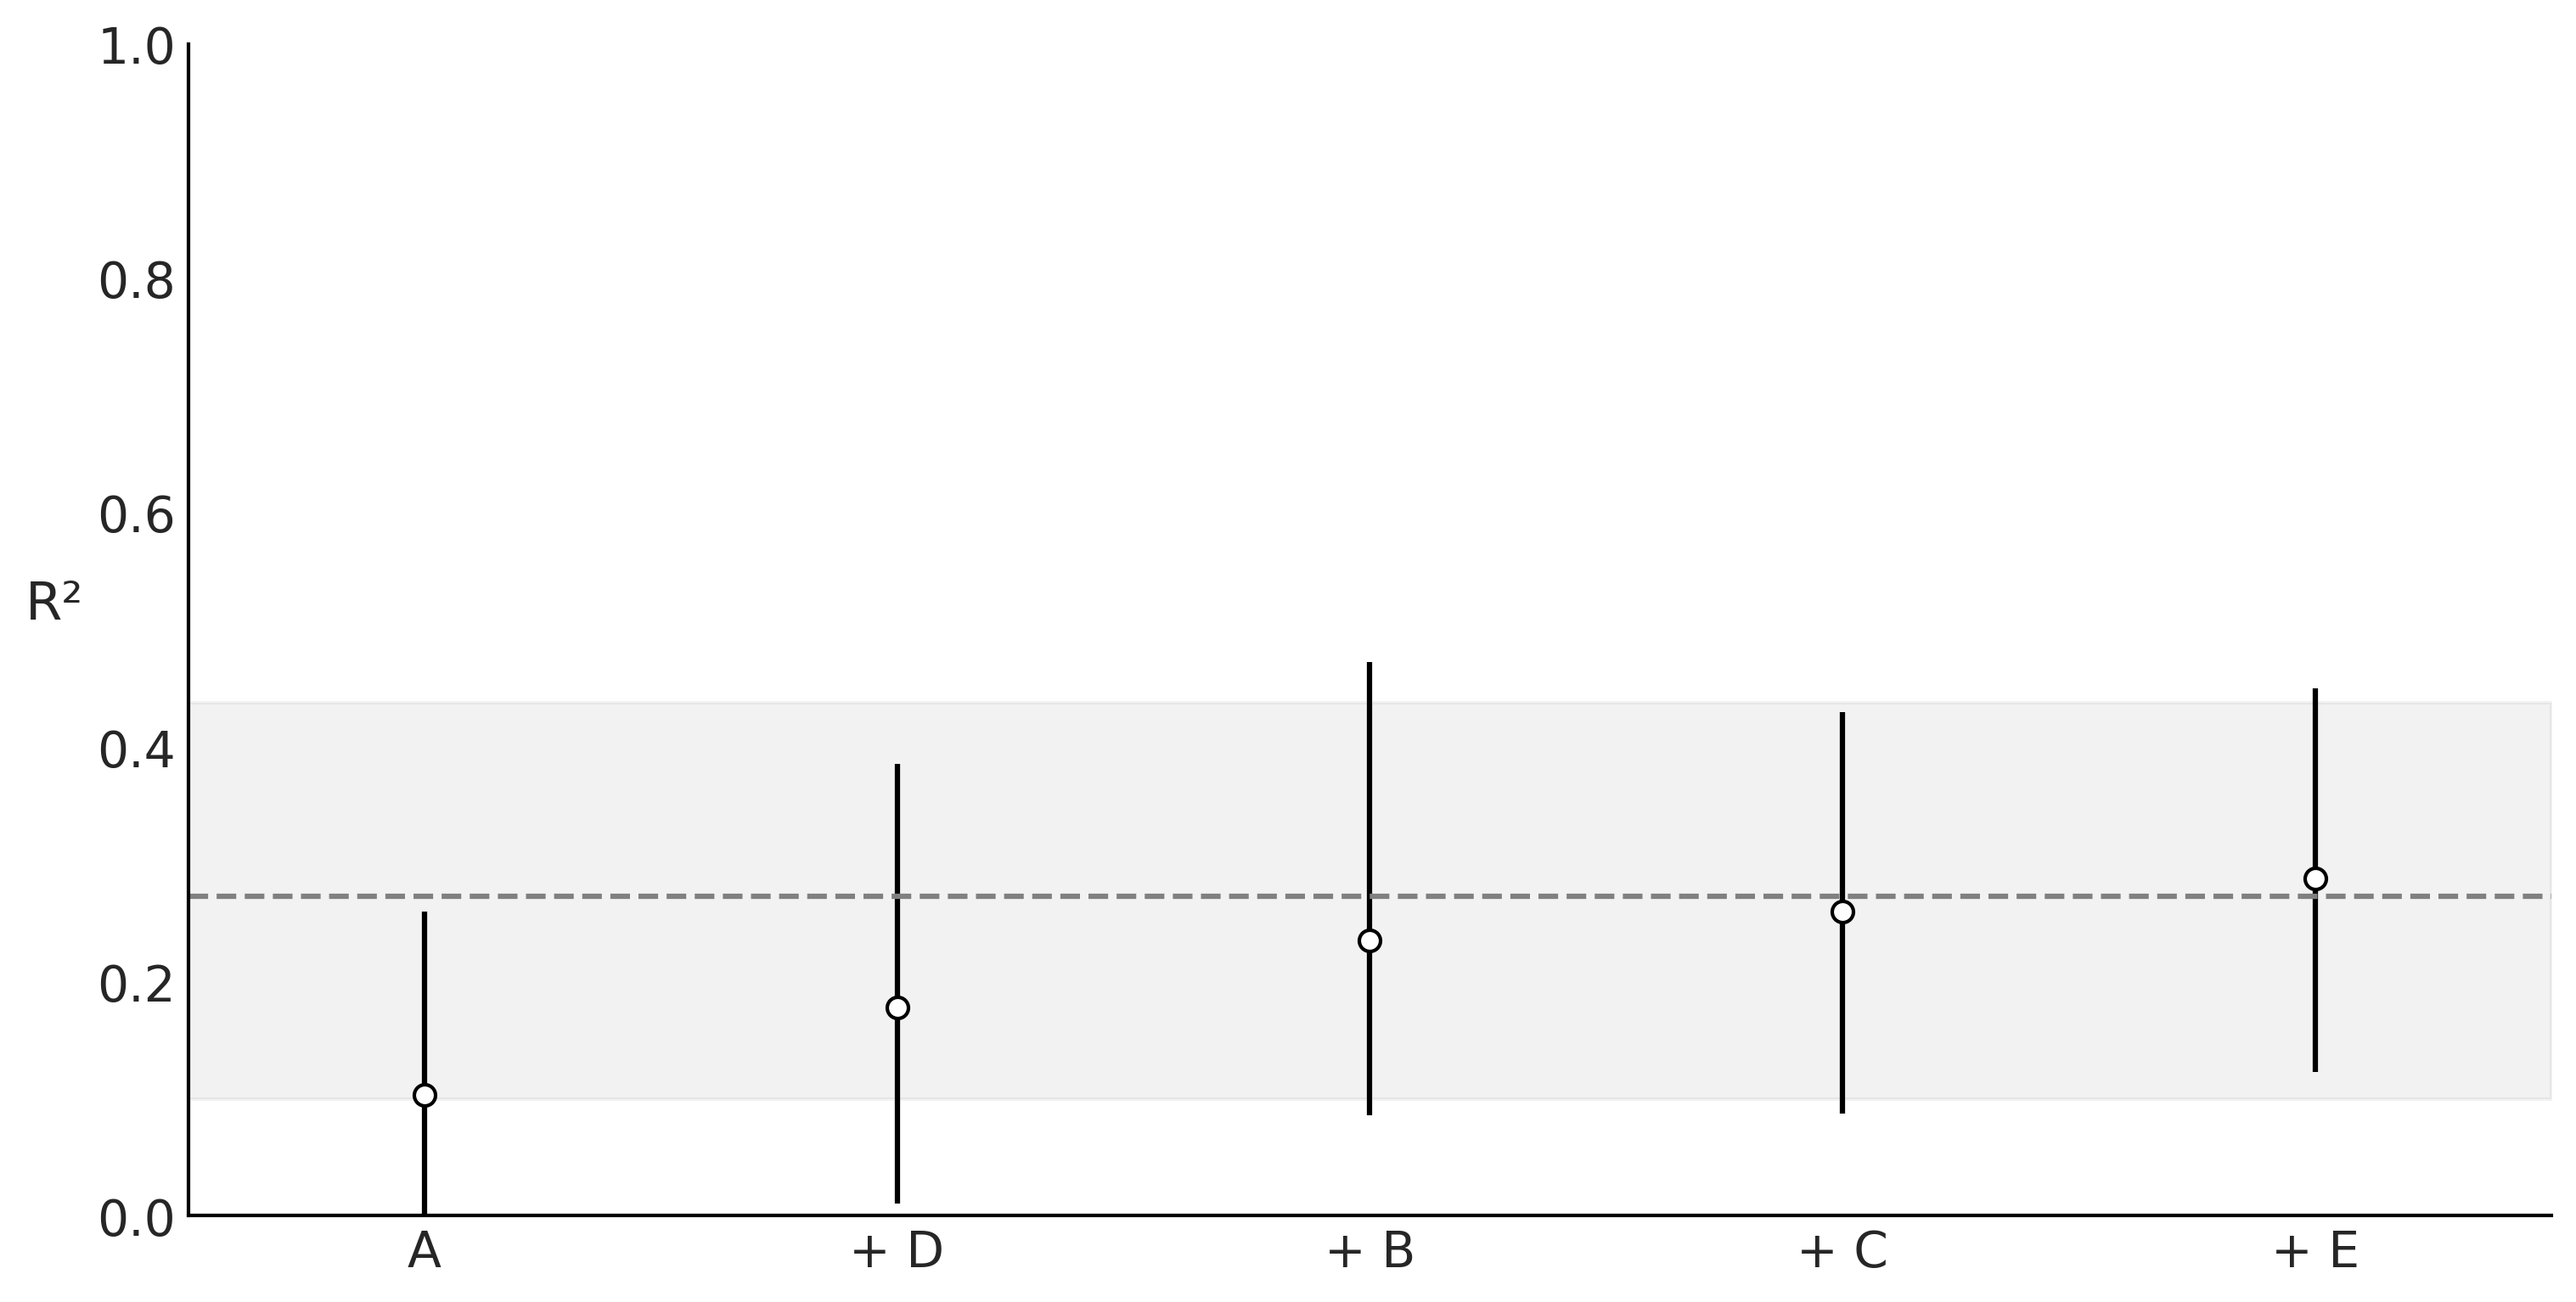

In [6]:
indices_bw, _ = pmb.utils.plot_variable_importance(
    idata,
    μ,
    X,
    method="backward",
    figsize=(10, 5),
    random_seed=RANDOM_SEED,
)

## Explicit computation of R² following method="VI" order, with m=50

In [7]:
idatas = []
bart_rvs = []

for idx in range(X.shape[1]):
    with pm.Model() as model:
        σ = pm.Exponential("σ", 1)
        μ = pmb.BART("μ_", X.iloc[:, indices_vi[: idx + 1]], Y, m=50)
        y = pm.Normal("y", mu=μ, sigma=σ, observed=Y)
        idata = pm.sample(
            chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
        )
        idatas.append(idata)
        bart_rvs.append(μ)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 92 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 88 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 88 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 95 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 92 seconds.


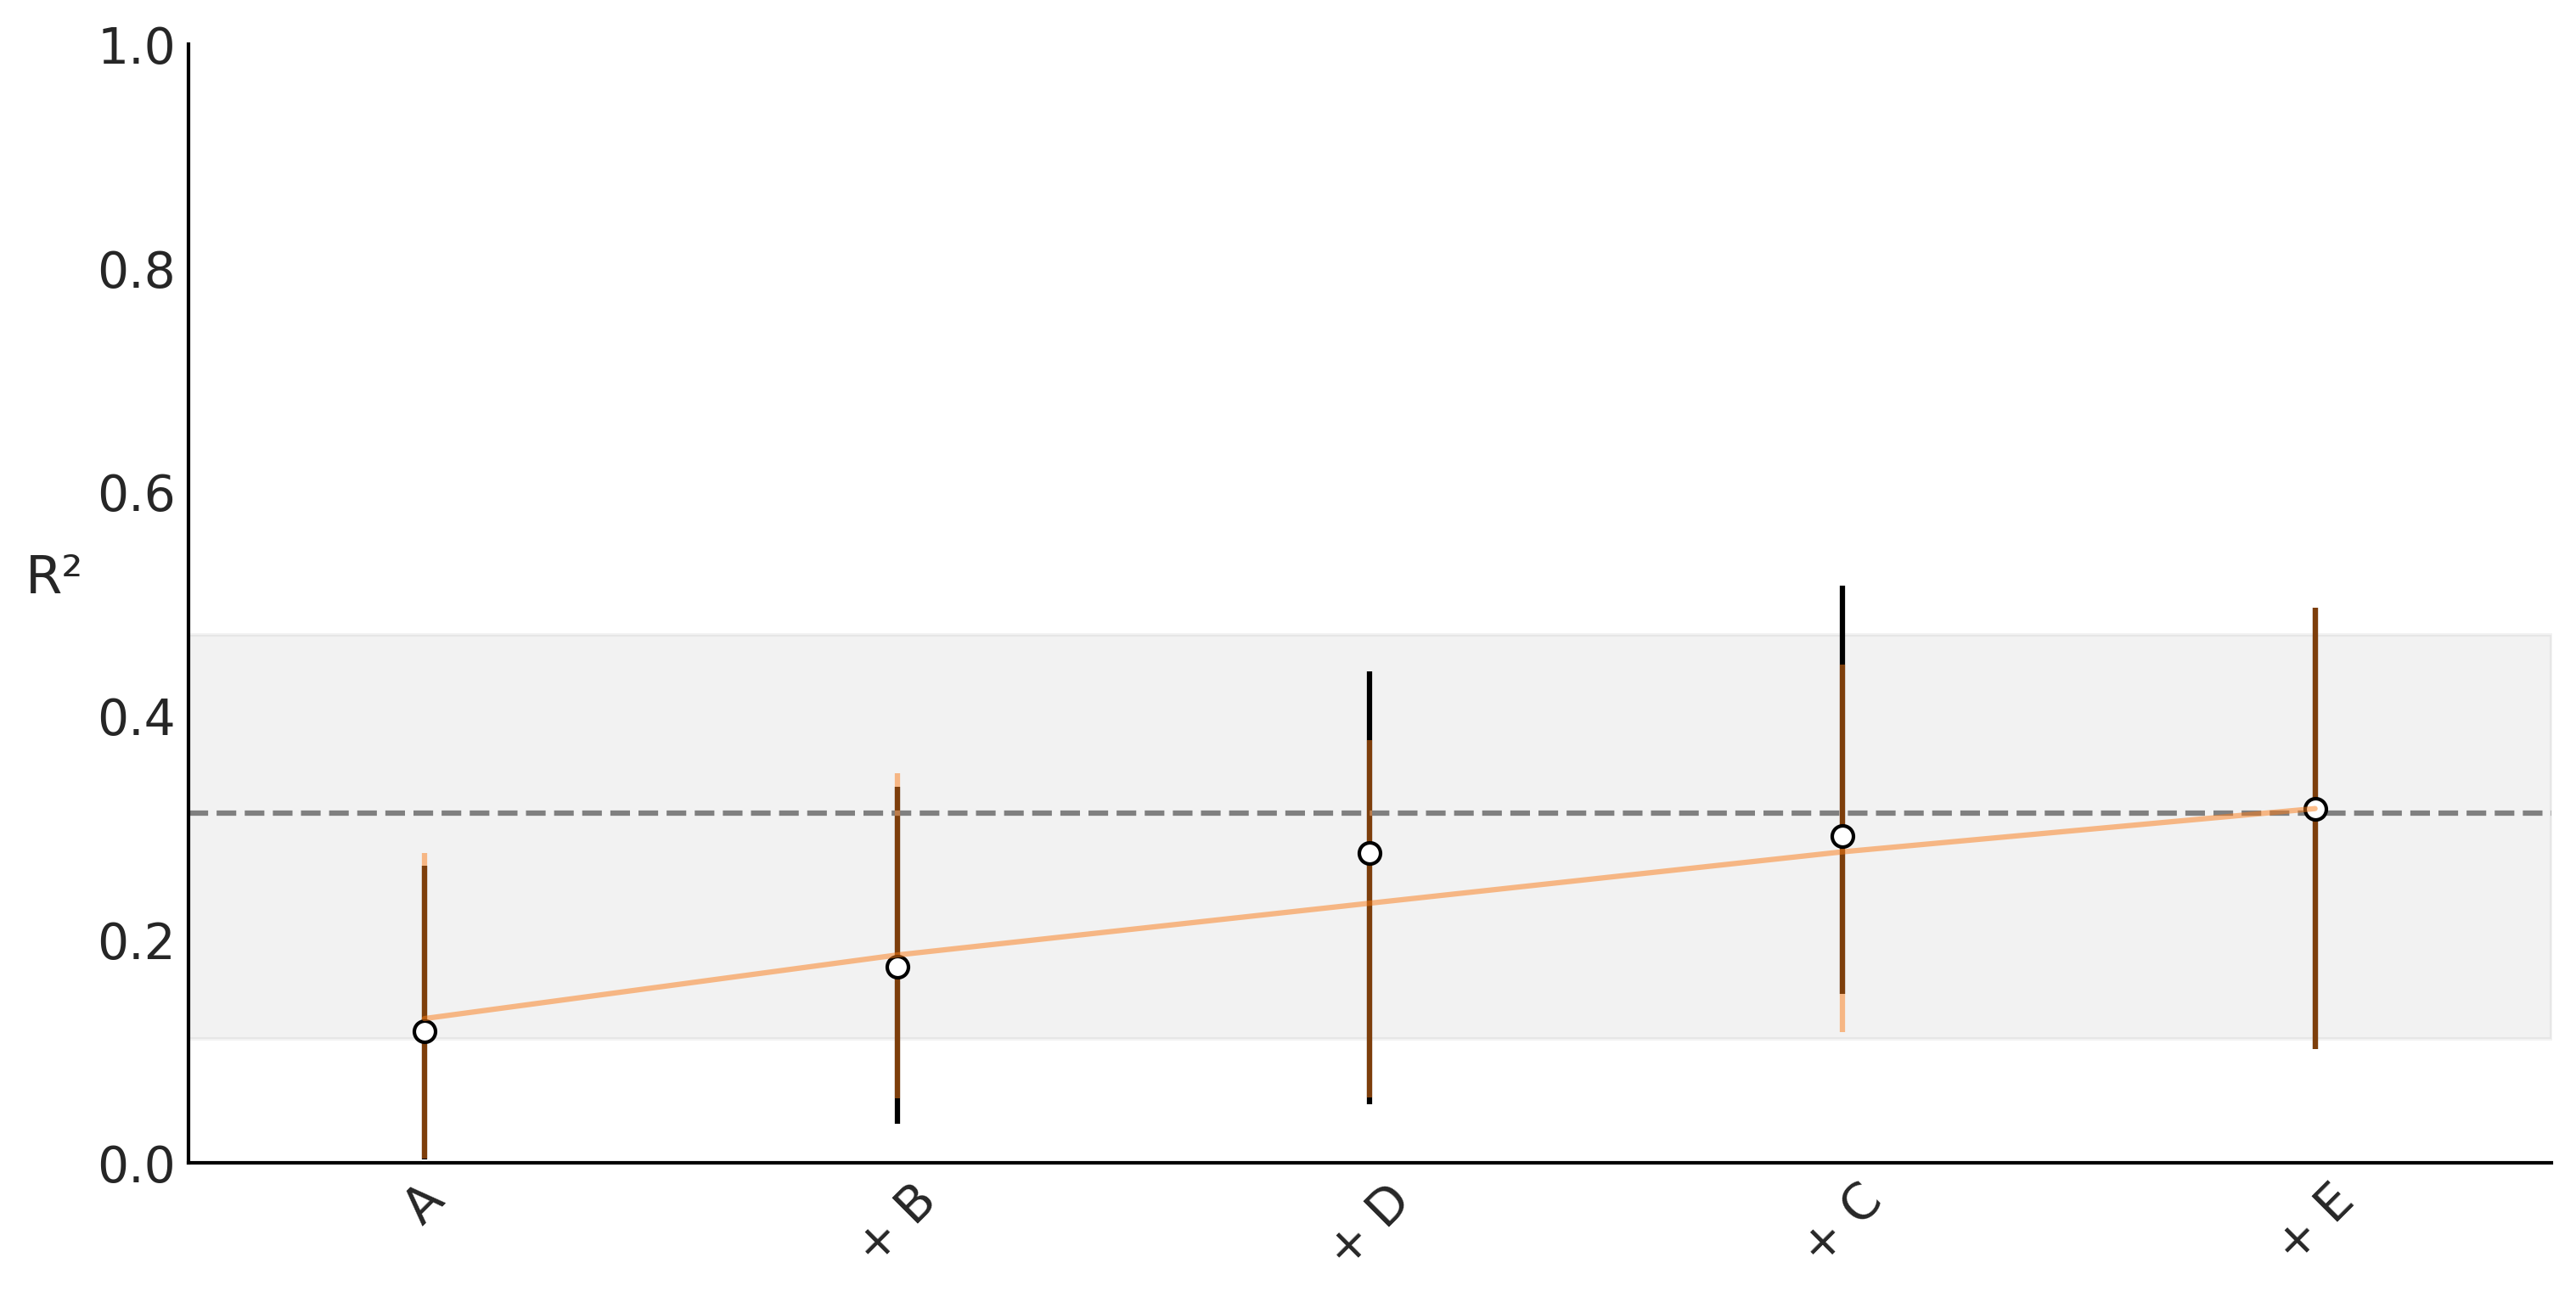

In [8]:
vi_evi(bart_rvs, idatas, X, indices_vi, "VI", 100, RANDOM_SEED, figsize=(10, 5))
plt.savefig("non_info_m50_vi.png")

## Explicit computation of R² following method="backward" order, with m=50

In [9]:
idatas = []
bart_rvs = []

for idx in range(X.shape[1]):
    with pm.Model() as model:
        σ = pm.Exponential("σ", 1)
        μ = pmb.BART("μ_", X.iloc[:, indices_bw[: idx + 1]], Y, m=50)
        y = pm.Normal("y", mu=μ, sigma=σ, observed=Y)
        idata = pm.sample(
            chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
        )
        idatas.append(idata)
        bart_rvs.append(μ)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 105 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 95 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 91 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 94 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 91 seconds.


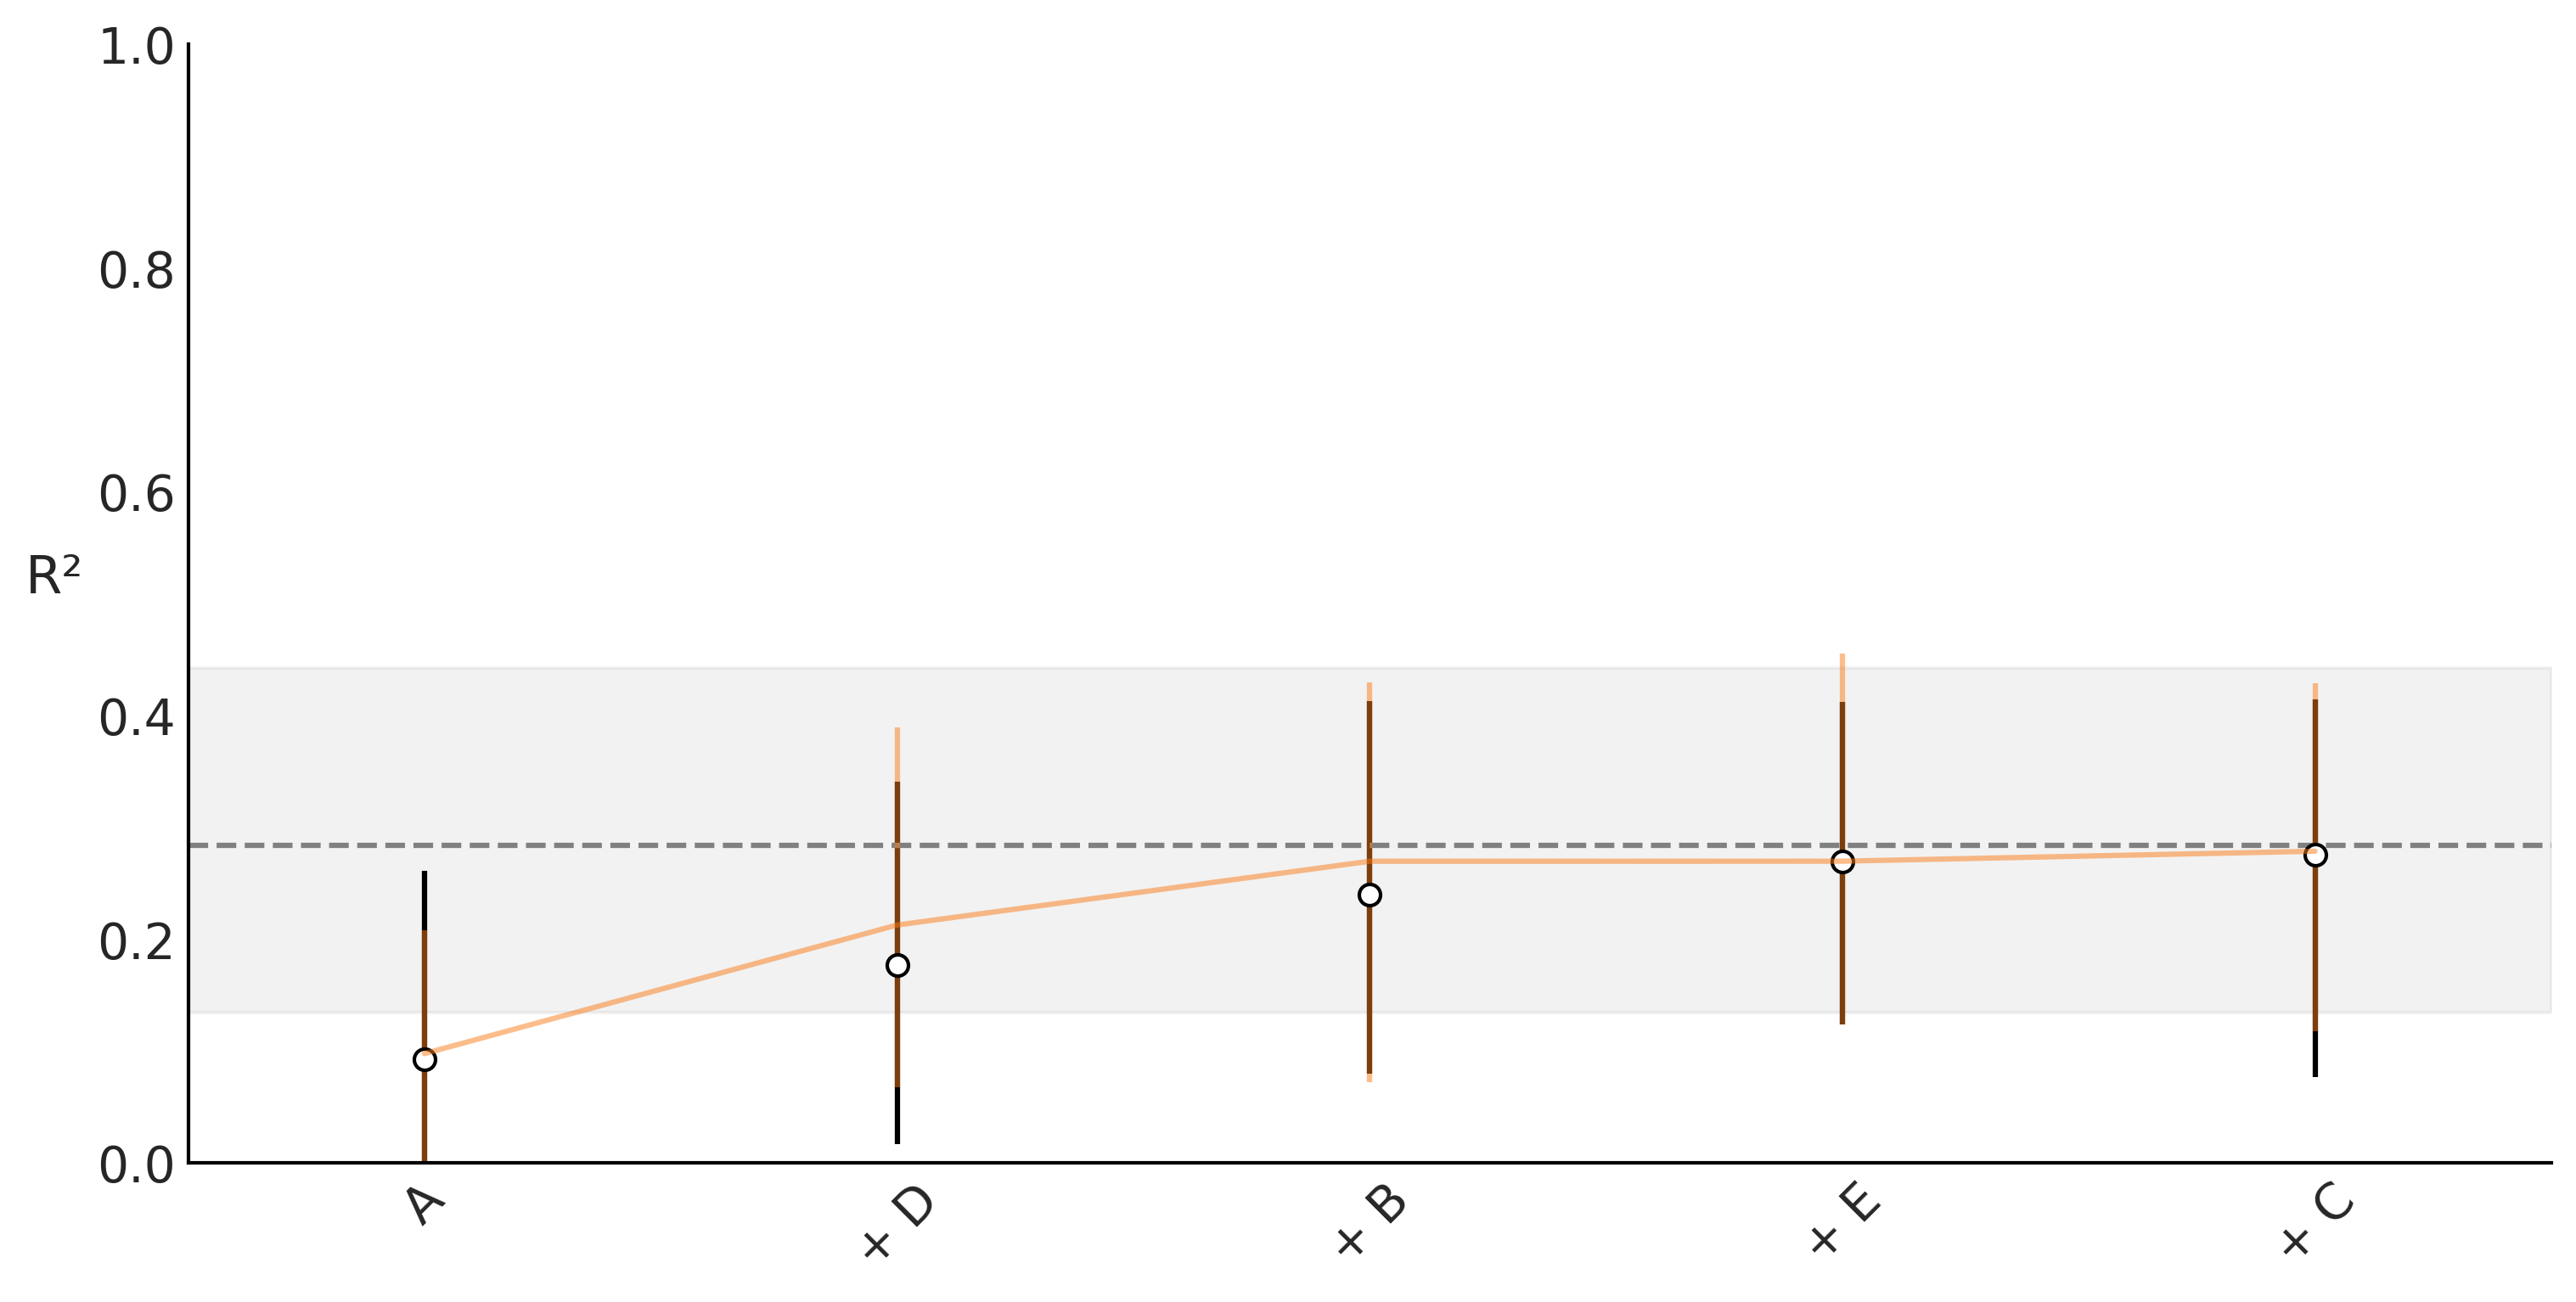

In [10]:
vi_evi(bart_rvs, idatas, X, indices_bw, "backward", 100, RANDOM_SEED, figsize=(10, 5))
plt.savefig("non_info_m50_bw.png")